In [1]:
import pandas as pd
import seaborn as sns
from pycaret.regression import *
import pycaret
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


## EDA

In [2]:
df=pd.read_csv("train_E1GspfA.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [4]:
df.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [5]:
df.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [6]:
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


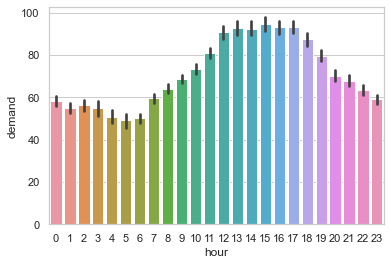

In [7]:
# Demand on hourly basis
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="hour", y="demand", data=df)

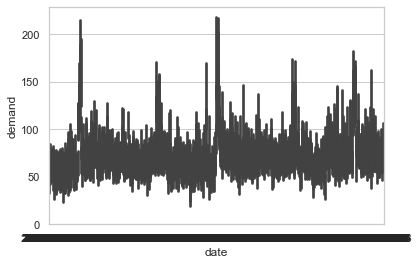

In [8]:
# demand on the basis of date 
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="date", y="demand", data=df)

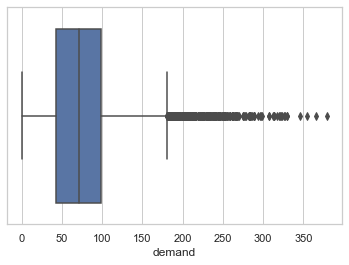

In [13]:
# The data is right skewed
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["demand"])

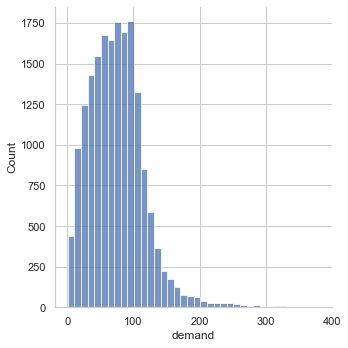

In [15]:
# Demand distribution is not a normal distribution (likely non-linear approach)
sns.set_theme(style="whitegrid")
sns.displot(df, x="demand", binwidth=10)

In [88]:
# maximum demand count/frequency 
demand_count['count'].max()

201

In [89]:
# demand that has appeared maximum number of times
demand_count[demand_count['count']==201]

,demand,count
0,93,201


<AxesSubplot:xlabel='hour', ylabel='demand'>

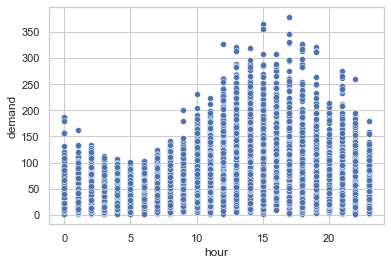

In [32]:
# actual demand vs hour 
sns.scatterplot(data=df, x="hour", y="demand")

## Feature Engineering

In [40]:
# 0 is monday and 6 is sunday, others have respective values.
df['weekday']=pd.to_datetime(df['date'],format = '%Y-%m-%d').dt.weekday

In [55]:
df['month']=pd.to_datetime(df['date'],format = '%Y-%m-%d').dt.month

In [56]:
df['year']=pd.to_datetime(df['date'],format = '%Y-%m-%d').dt.year

In [57]:
df['week']=pd.to_datetime(df['date'],format = '%Y-%m-%d').dt.week

In [61]:
df.head()

,date,hour,demand,weekday,month,year,week
0,2018-08-18,9,91,5,8,2018,33
1,2018-08-18,10,21,5,8,2018,33
2,2018-08-18,13,23,5,8,2018,33
3,2018-08-18,14,104,5,8,2018,33
4,2018-08-18,15,81,5,8,2018,33


## EDA 2

In [82]:
# calculating the demand with max frequency
demand_count=df["demand"].value_counts().reset_index().rename({'index':'demand','demand':'count'},axis=1).head()

In [87]:
demand_count.head()

,demand,count
0,93,201
1,100,197
2,87,192
3,76,190
4,56,188


In [93]:
# The demand with maximum frequency is applied mostly on Wed
# This implies there are days with more demands but Wednesday's demands are more consistent 
# as they have 201 demands with 93 demands for car
# Wednesday are most consistent demand days
df[df['demand']==93]['weekday'].value_counts()

2    39
4    36
6    34
0    27
1    25
5    21
3    19
Name: weekday, dtype: int64

In [68]:
# Taking only the numerical cols
print(df.columns)
numerical=['hour', 'demand', 'weekday', 'month', 'year', 'week']

Index(['date', 'hour', 'demand', 'weekday', 'month', 'year', 'week'], dtype='object')


In [72]:
# Finding the correlation to make a heatmap
correlation = df[numerical].corr()

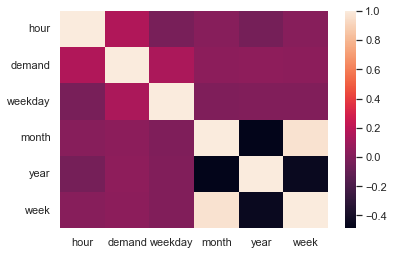

In [73]:
sns.set_theme()
ax = sns.heatmap(correlation)

<AxesSubplot:>

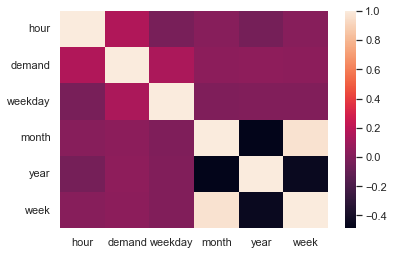

In [74]:
# Normalizing it by cols to retry correlation heatmap
df_norm_col=(df[numerical]-df[numerical].mean())/df[numerical].std()
correlation_norm=df_norm_col.corr()
sns.heatmap(correlation_norm)
#plt.show()

In [427]:
# Demand has no correlation to anything, implying a non-linear relationship.

In [49]:
# Relationship with weekdays to demand
df_weekday=df['weekday'].value_counts().reset_index().rename({'index':'weekday','weekday':'demand frequency'},axis=1)

<AxesSubplot:xlabel='weekday', ylabel='demand frequency'>

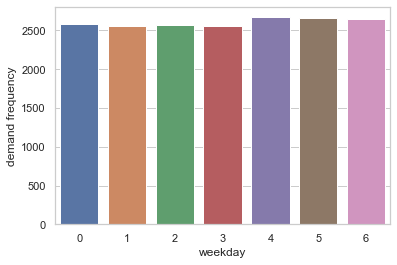

In [51]:
sns.barplot(x='weekday',y='demand frequency',data=df_weekday)

<AxesSubplot:xlabel='weekday', ylabel='demand frequency'>

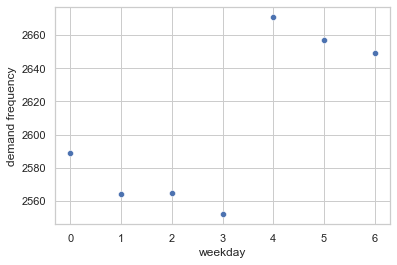

In [53]:
# The demand frequency is highest on Friday, Saturday and Sunday, respectively, with least demand on Thur.
sns.scatterplot(x='weekday',y='demand frequency',data=df_weekday,palette="deep")

In [95]:
# actual demand partioned by weekday
actual_demand=df.groupby(['weekday'])['demand'].sum()

In [100]:
actual_demand=actual_demand.reset_index().rename({'weekday':'hours'},axis=1)

In [101]:
actual_demand

,hours,demand
0,0,178922
1,1,172576
2,2,173951
3,3,177813
4,4,202189
5,5,230654
6,6,214017


<AxesSubplot:xlabel='hours', ylabel='demand'>

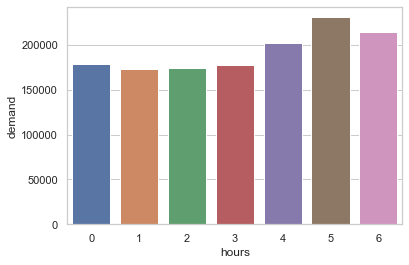

In [102]:
# actual demand aggregated by the weekdays
# The demand is highest on Saturdays followed by Sunday and then Friday
# The least demand is on Tuesday
sns.barplot(data=actual_demand,x='hours',y='demand')

In [18]:
# counting hours frequency in the dataset 
df_hour=df['hour'].value_counts().reset_index()

In [103]:
df_hour.rename({'index':'hours','hour':'count'},axis=1,inplace=True)

In [106]:
df_hour

,hours,count
0,16,892
1,15,890
2,13,889
3,17,889
4,12,888
5,14,886
6,18,884
7,10,884
8,11,883
9,9,878


In [111]:
# At 4:00 pm the demand frequency is highest 
df_hour[df_hour['count'].max()==df_hour['count']]

,hours,count
0,16,892


In [112]:
# At 3:00 am the demand frequency is least
df_hour[df_hour['count'].min()==df_hour['count']]

,hours,count
23,3,287


<AxesSubplot:xlabel='hours', ylabel='count'>

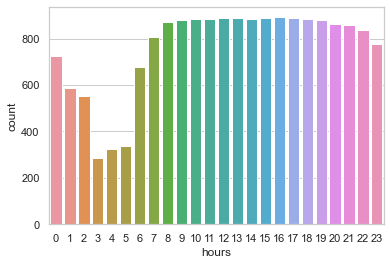

In [113]:
# frequency of different hours in the data
# Data seems to be imbalanced among the early morning hours of 12:00 am to 6:00 am
sns.barplot(data=df_hour,x='hours',y='count')

In [114]:
# Different days and hours with aggregated demand
df_day_hours=df.groupby(['hour','weekday'])['demand'].sum()

In [117]:
df_day_hours.head(15)

hour  weekday
0     0          6052
      1          4834
      2          5240
      3          5139
      4          6308
      5          7033
      6          7586
1     0          3823
      1          3238
      2          3186
      3          3290
      4          4985
      5          6418
      6          7368
2     0          2737
Name: demand, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='demand'>

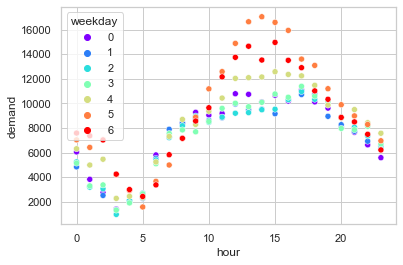

In [132]:
# Demand with repect to both Week day and time
# The demand is highest between 12:00 pm to 16:00 pm on Saturday, followed by Sunday and Friday 
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_day_hours.reset_index(),x='hour',y='demand',hue='weekday',palette='rainbow')

## Model 1: Decision Tree Regressor

In [162]:
# features and target
X=df[['hour', 'weekday', 'month', 'year', 'week']]
y=df['demand']

In [163]:
car_model = DecisionTreeRegressor()

In [164]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1,)

In [165]:
car_model.fit(train_X,train_y,)

DecisionTreeRegressor()

In [166]:
val_predictions =car_model.predict(val_X)


In [167]:
print(val_predictions[:5])
print(val_y[:5])

[59. 45. 81. 72. 62.]
4933    44
8079    87
8881    25
2069    25
5179    37
Name: demand, dtype: int64


In [168]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(val_y,val_predictions,  squared=False)

In [169]:
rms

45.1501635031119

## Model 2: Random Forest Regressor

In [201]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(train_X,train_y)


RandomForestRegressor(random_state=0)

In [202]:
val_predictions=regr.predict(val_X)

In [203]:
rms = mean_squared_error(val_y,val_predictions,  squared=False)

In [204]:
rms

34.07537664068784

## Hypertuning Random Forest

In [207]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [209]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [213]:
val_predictions=rf_random.predict(val_X)

In [214]:
rms = mean_squared_error(val_y,val_predictions,  squared=False)

In [215]:
rms

32.57150230280633

## Model 3 Artificial Neural Network

In [483]:
X=np.array(X).reshape(-1,5)
y=np.array(y).reshape(-1, 1)

In [484]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1 = StandardScaler()
X = sc.fit_transform(X)
y = sc1.fit_transform(np.array(y).reshape(-1, 1))

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [486]:
import tensorflow.keras.optimizers as opt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(Dense(200,input_dim=5, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))




In [487]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 200)               1200      
_________________________________________________________________
dropout_60 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 100)               20100     
_________________________________________________________________
dropout_61 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_62 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 20)              

In [488]:
lr_schedule = opt.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.9)

adm  = opt.Adam(learning_rate=lr_schedule)

In [489]:
# Both loss and metric are set to Mean Squared Error
model.compile(loss='mse',optimizer='adam',metrics=[RootMeanSquaredError()])


In [490]:
# Setting model checkpoints for early stopping and saving the best model 
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model_checkpoint = ModelCheckpoint(
                   'Deep_learning_model_2.h5', save_best_only=True)

In [491]:
history=model.fit(x=X_train,y=y_train,epochs=200,validation_split=0.2,callbacks=[early_stop,model_checkpoint])

Epoch 1/200
320/320 [==============================] - 1s 2ms/step - loss: 0.9779 - root_mean_squared_error: 0.9889 - val_loss: 0.9488 - val_root_mean_squared_error: 0.9740
Epoch 2/200
320/320 [==============================] - 1s 2ms/step - loss: 0.9115 - root_mean_squared_error: 0.9547 - val_loss: 0.9030 - val_root_mean_squared_error: 0.9503
Epoch 3/200
320/320 [==============================] - 1s 2ms/step - loss: 0.8871 - root_mean_squared_error: 0.9419 - val_loss: 0.8963 - val_root_mean_squared_error: 0.9467
Epoch 4/200
320/320 [==============================] - 1s 2ms/step - loss: 0.8660 - root_mean_squared_error: 0.9306 - val_loss: 0.8820 - val_root_mean_squared_error: 0.9392
Epoch 5/200
320/320 [==============================] - 1s 2ms/step - loss: 0.8534 - root_mean_squared_error: 0.9238 - val_loss: 0.8574 - val_root_mean_squared_error: 0.9260
Epoch 6/200
320/320 [==============================] - 1s 2ms/step - loss: 0.8491 - root_mean_squared_error: 0.9215 - val_loss: 0.8586 

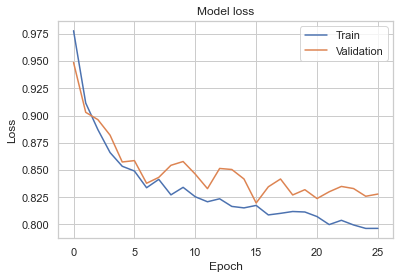

In [492]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train','Validation'], loc='upper right') 
plt.show()

In [500]:
from sklearn.metrics import mean_squared_error
from math import sqrt

transformed_forecast = model.predict(X_test)
forecast = sc1.inverse_transform(transformed_forecast)
y_test_inv = sc1.inverse_transform(y_test)



rmse  = sqrt(mean_squared_error(y_test_inv,forecast))
print('RMSE of demand of cars using Deep Learning Model: {}'
      .format(round(rmse, 3)))


RMSE of demand of cars using Deep Learning Model: 0.876


## Prediction on Test data

In [428]:
# on test data
df_test=pd.read_csv('test_6QvDdzb.csv')
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [430]:
df_test['weekday']=pd.to_datetime(df_test['date'],format = '%Y-%m-%d').dt.weekday
df_test['month']=pd.to_datetime(df_test['date'],format = '%Y-%m-%d').dt.month
df_test['year']=pd.to_datetime(df_test['date'],format = '%Y-%m-%d').dt.year
df_test['week']=pd.to_datetime(df_test['date'],format = '%Y-%m-%d').dt.week

In [431]:
X_test = df_test[['hour', 'weekday', 'month', 'year', 'week']]

In [432]:
test_predictions=rf_random.predict(X_test)

In [453]:
test_predictions

array([57.38723522, 44.23794172, 52.13645611, ..., 70.22163265,
       55.44459481, 64.67151186])

In [463]:
re=map(round,test_predictions)

In [464]:
test_demands=list(re)

In [465]:
df_test_fin=df_test[['date','hour']]

In [468]:
df_test_fin['demand']=test_demands

In [470]:
df_test_fin.to_csv("Vasanth_submission.csv",index=False)